IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.metrics import silhouette_score
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

LOAD DATA

In [594]:
df = pd.read_excel("kalbe Farma Clean FIKS.xlsx")
df

,transaction_id,customer_id,transaction_date,product_id,price,qty,total_amount,store_id,age,gender,marital_status,income,product_name,store_name,group_store,type,latitude,longitude
0,T00001,C0328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Lingga,Lingga,Modern Trade,-5.1354,119.423790
1,T00001,C0328,2022-01-01,P9,10000,2,20000,12,36,0,Married,10.53,Yoghurt,Lingga,Lingga,Modern Trade,-5.1354,119.423790
2,T00001,C0328,2022-01-01,P1,8800,4,35200,12,36,0,Married,10.53,Choco Bar,Lingga,Lingga,Modern Trade,-5.1354,119.423790
3,T00002,C0017,2022-01-01,P9,10000,7,70000,12,44,1,Married,14.58,Yoghurt,Lingga,Lingga,Modern Trade,-5.1354,119.423790
4,T00002,C0017,2022-01-01,P9,10000,7,70000,12,44,1,Married,14.58,Yoghurt,Lingga,Lingga,Modern Trade,-5.1354,119.423790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5019,T01680,C0291,2022-12-31,P10,15000,5,75000,12,38,0,Married,3.34,Cheese Stick,Lingga,Lingga,Modern Trade,-5.1354,119.423790
5020,T01681,C0291,2022-12-31,P2,3200,4,12800,12,29,0,Married,4.74,Ginger Candy,Lingga,Lingga,Modern Trade,-3.6547,128.190643
5021,T01681,C0291,2022-12-31,P7,9400,6,56400,12,37,0,Married,3.73,Coffee Candy,Lingga,Lingga,Modern Trade,-3.6547,128.190643
5022,T01681,C0291,2022-12-31,P8,16000,3,48000,12,47,0,Married,13.60,Oat,Lingga,Lingga,Modern Trade,-5.1354,119.423790


DATA UNDERSTANDING

In [595]:
df.head()

,transaction_id,customer_id,transaction_date,product_id,price,qty,total_amount,store_id,age,gender,marital_status,income,product_name,store_name,group_store,type,latitude,longitude
0,T00001,C0328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Lingga,Lingga,Modern Trade,-5.1354,119.42379
1,T00001,C0328,2022-01-01,P9,10000,2,20000,12,36,0,Married,10.53,Yoghurt,Lingga,Lingga,Modern Trade,-5.1354,119.42379
2,T00001,C0328,2022-01-01,P1,8800,4,35200,12,36,0,Married,10.53,Choco Bar,Lingga,Lingga,Modern Trade,-5.1354,119.42379
3,T00002,C0017,2022-01-01,P9,10000,7,70000,12,44,1,Married,14.58,Yoghurt,Lingga,Lingga,Modern Trade,-5.1354,119.42379
4,T00002,C0017,2022-01-01,P9,10000,7,70000,12,44,1,Married,14.58,Yoghurt,Lingga,Lingga,Modern Trade,-5.1354,119.42379


In [596]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024 entries, 0 to 5023
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    5024 non-null   object        
 1   customer_id       5024 non-null   object        
 2   transaction_date  5024 non-null   datetime64[ns]
 3   product_id        5024 non-null   object        
 4   price             5024 non-null   int64         
 5   qty               5024 non-null   int64         
 6   total_amount      5024 non-null   int64         
 7   store_id          5024 non-null   int64         
 8   age               5024 non-null   int64         
 9   gender            5024 non-null   int64         
 10  marital_status    5024 non-null   object        
 11  income            5024 non-null   float64       
 12  product_name      5024 non-null   object        
 13  store_name        5024 non-null   object        
 14  group_store       5024 n

In [597]:
df.describe(include='object')

,transaction_id,customer_id,product_id,marital_status,product_name,store_name,group_store,type
count,5024,5024,5024,5024,5024,5024,5024,5024
unique,1682,492,10,2,10,1,1,1
top,T01663,C0388,P5,Married,Thai Tea,Lingga,Lingga,Modern Trade
freq,5,31,814,3827,814,5024,5024,5024


In [598]:
df.describe()

,transaction_date,price,qty,total_amount,store_id,age,gender,income,latitude,longitude
count,5024,5024.000000,5024.000000,5024.000000,5024.0,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000
mean,2022-06-28 21:07:09.936305664,9684.812898,3.645701,32292.635350,12.0,40.271298,0.453025,8.626843,-5.032836,120.031048
min,2022-01-01 00:00:00,3200.000000,1.000000,7500.000000,12.0,18.000000,0.000000,0.000000,-5.135400,119.423790
25%,2022-03-29 00:00:00,4200.000000,2.000000,16000.000000,12.0,31.000000,0.000000,4.220000,-5.135400,119.423790
50%,2022-06-26 00:00:00,9400.000000,3.000000,28200.000000,12.0,39.000000,0.000000,7.720000,-5.135400,119.423790
75%,2022-09-28 00:00:00,15000.000000,5.000000,47000.000000,12.0,51.000000,1.000000,10.780000,-5.135400,119.423790
max,2022-12-31 00:00:00,18000.000000,10.000000,88000.000000,12.0,72.000000,1.000000,71.300000,-3.654700,128.190643
std,NaN,4598.899955,1.855916,19682.825378,0.0,12.473593,0.497838,6.516840,0.376000,2.226200


In [599]:
# Get unique values of the 'age' column
unique_ages = df['age'].unique()

# Print the unique ages
unique_ages

array([36, 44, 27, 48, 33, 19, 45, 49, 43, 34, 53, 35, 29, 58, 47, 37, 32,
       20, 30, 41, 59, 38, 31, 52, 24, 28, 61, 57, 51, 40, 55, 54, 18, 46,
       39, 72, 22, 21, 50, 26, 23, 25, 62, 42, 56, 60, 68, 65, 66, 69, 70])

In [600]:
# Get unique values of the 'age' column
unique_store = df['store_name'].unique()

# Print the unique ages
unique_store

array(['Lingga'], dtype=object)

In [601]:
# Get unique values of the 'age' column
unique_product = df['product_name'].unique()

# Print the unique ages
unique_product

array(['Crackers', 'Yoghurt', 'Choco Bar', 'Cheese Stick', 'Oat',
       'Thai Tea', 'Coffee Candy', 'Potato Chip', 'Ginger Candy',
       'Cashew'], dtype=object)

In [602]:
df['transaction_date'].max
df['transaction_date'].min
print(f"tanggal awa transasksi {df['transaction_date'].min()} dan tanggal akhir transaksi {df['transaction_date'].max()}")

tanggal awa transasksi 2022-01-01 00:00:00 dan tanggal akhir transaksi 2022-12-31 00:00:00


In [603]:
# Define a custom color palette
custom_palette = ["#006400", "#000000", "#FFFFFF"]  # Dark Green, Black, White

# Apply the custom theme to seaborn
sns.set_style("whitegrid")
sns.set_palette([custom_palette[0]])

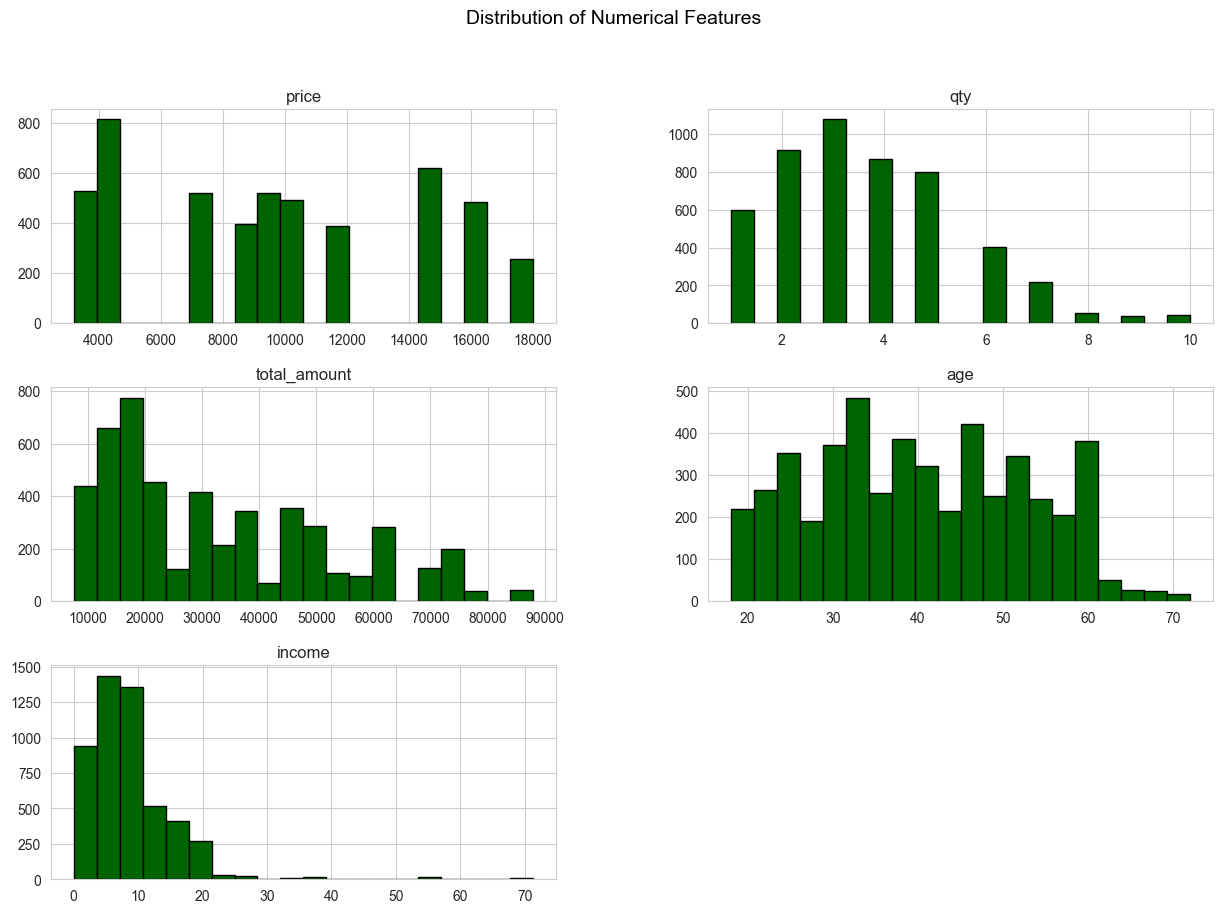

In [604]:
# 1. Distribution of numerical features
num_features = ['price', 'qty', 'total_amount', 'age', 'income']
df[num_features].hist(bins=20, figsize=(15, 10), edgecolor='black', color=custom_palette[0])
plt.suptitle("Distribution of Numerical Features", fontsize=14, color=custom_palette[1])
plt.show()

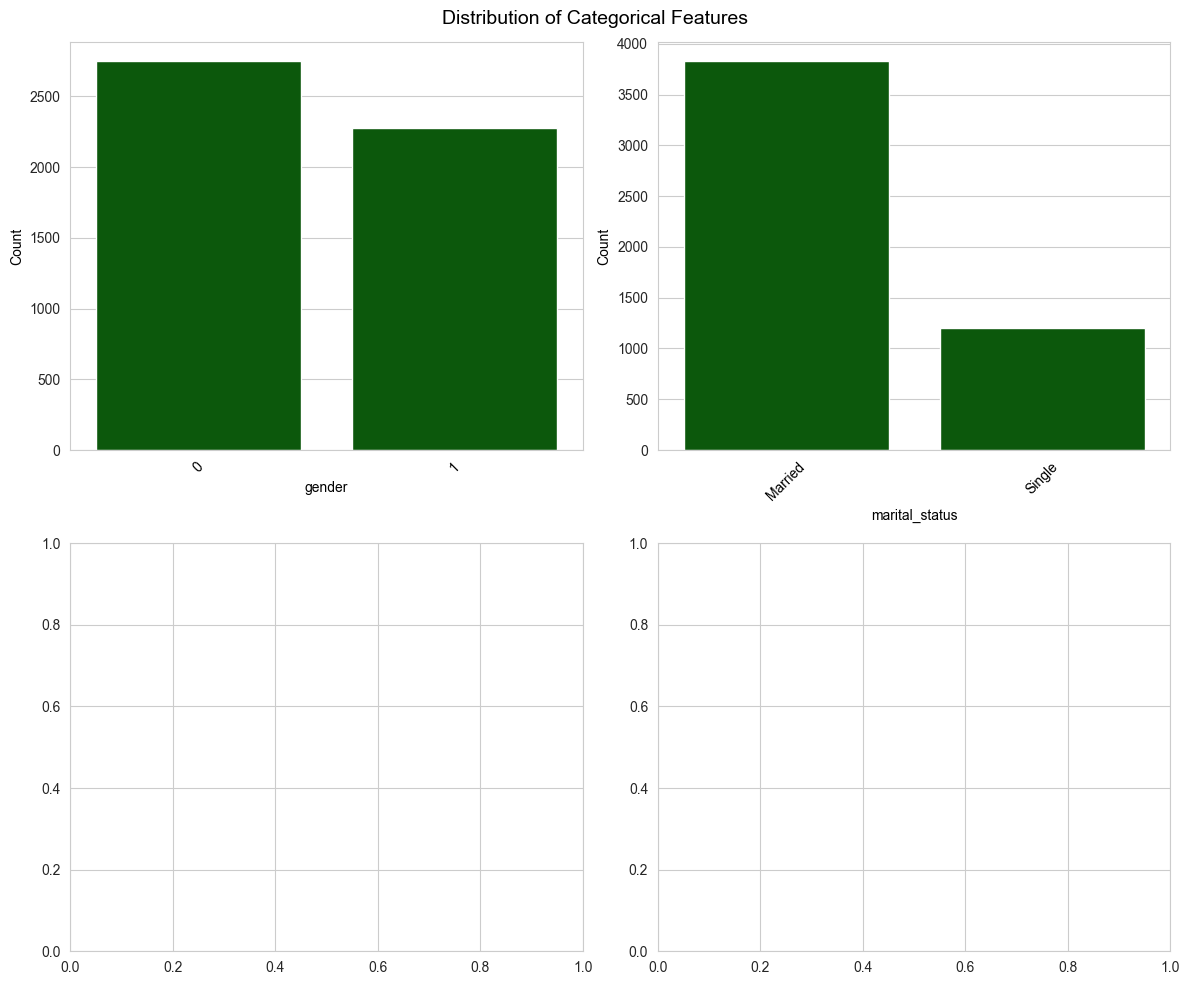

In [605]:
# 2. Count plots for categorical features
cat_features = ['gender', 'marital_status']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Distribution of Categorical Features", fontsize=14, color=custom_palette[1])

for ax, feature in zip(axes.flatten(), cat_features):
    sns.countplot(data=df, x=feature, ax=ax, palette=[custom_palette[0]])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, color=custom_palette[1])
    ax.set_xlabel(feature, color=custom_palette[1])
    ax.set_ylabel("Count", color=custom_palette[1])

plt.tight_layout()
plt.show()

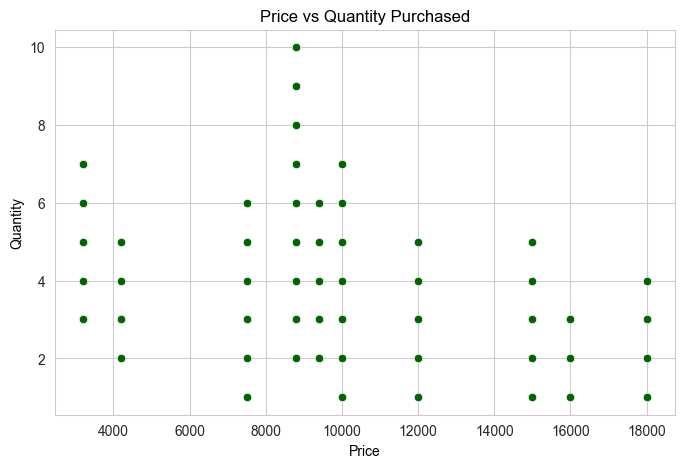

In [606]:
# 1. Price vs Quantity Purchased
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['price'], y=df['qty'], color=custom_palette[0])
plt.title("Price vs Quantity Purchased", color=custom_palette[1])
plt.xlabel("Price", color=custom_palette[1])
plt.ylabel("Quantity", color=custom_palette[1])
plt.show()

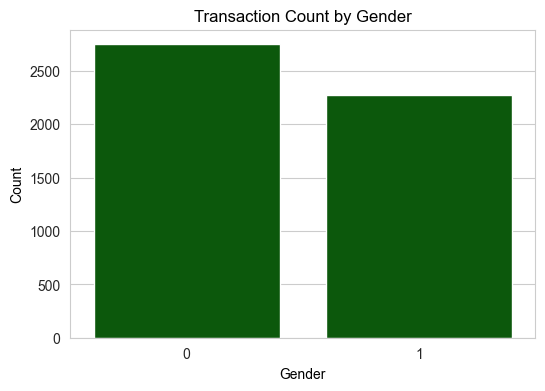

In [607]:
# 5. Count of Transactions by Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="gender", palette=[custom_palette[0]])
plt.title("Transaction Count by Gender", color=custom_palette[1])
plt.xlabel("Gender", color=custom_palette[1])
plt.ylabel("Count", color=custom_palette[1])
plt.show()

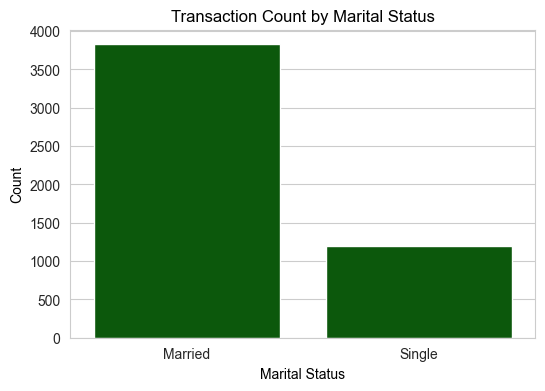

In [608]:
# 6. Count of Transactions by Marital Status
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="marital_status", palette=[custom_palette[0]])
plt.title("Transaction Count by Marital Status", color=custom_palette[1])
plt.xlabel("Marital Status", color=custom_palette[1])
plt.ylabel("Count", color=custom_palette[1])
plt.show()

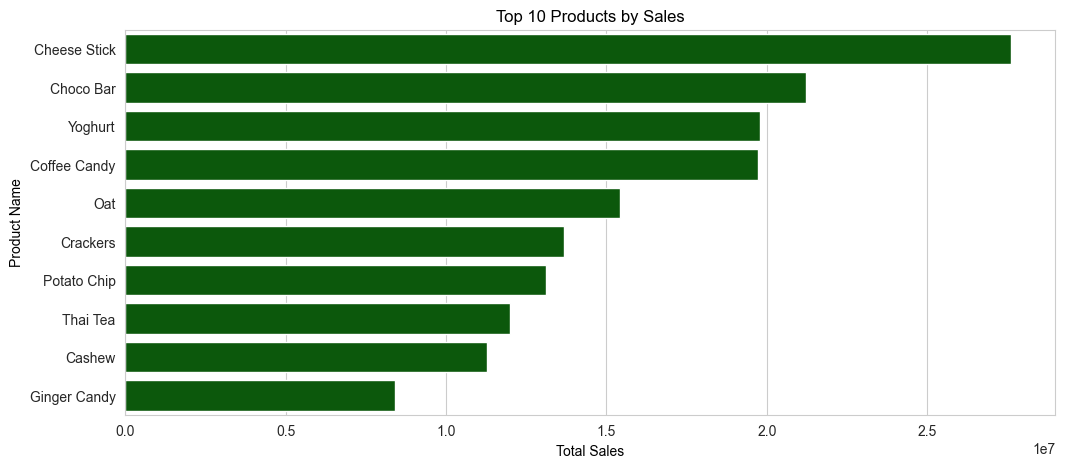

In [609]:
# 10. Relationship between Product and Total Sales
product_sales = df.groupby("product_name")["total_amount"].sum().reset_index().sort_values("total_amount", ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x="total_amount", y="product_name", data=product_sales[:10], palette=[custom_palette[0]])
plt.title("Top 10 Products by Sales", color=custom_palette[1])
plt.xlabel("Total Sales", color=custom_palette[1])
plt.ylabel("Product Name", color=custom_palette[1])
plt.show()

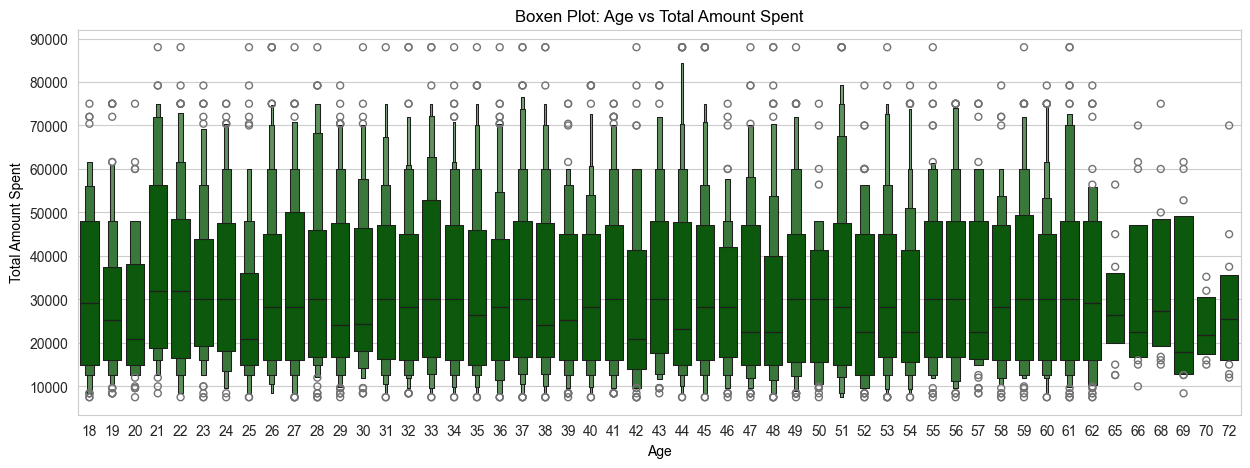

In [610]:
# 19. Relationship between Age and Total Amount Spent using Boxen Plot
plt.figure(figsize=(15, 5))
sns.boxenplot(x=df['age'], y=df['total_amount'], palette=[custom_palette[0]])
plt.title("Boxen Plot: Age vs Total Amount Spent", color=custom_palette[1])
plt.xlabel("Age", color=custom_palette[1])
plt.ylabel("Total Amount Spent", color=custom_palette[1])
plt.show()

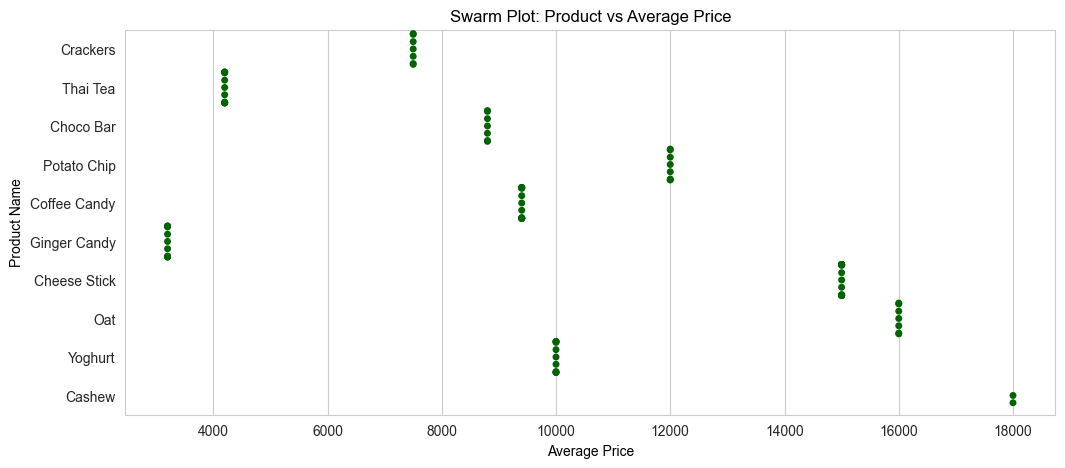

In [611]:
# 16. Relationship between Product and Average Price using Swarmplot
plt.figure(figsize=(12, 5))
sns.swarmplot(x="price", y="product_name", data=df.sample(100), palette=[custom_palette[0]])
plt.title("Swarm Plot: Product vs Average Price", color=custom_palette[1])
plt.xlabel("Average Price", color=custom_palette[1])
plt.ylabel("Product Name", color=custom_palette[1])
plt.show()

DATA PREPOCESING

In [612]:
df

,transaction_id,customer_id,transaction_date,product_id,price,qty,total_amount,store_id,age,gender,marital_status,income,product_name,store_name,group_store,type,latitude,longitude
0,T00001,C0328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Lingga,Lingga,Modern Trade,-5.1354,119.423790
1,T00001,C0328,2022-01-01,P9,10000,2,20000,12,36,0,Married,10.53,Yoghurt,Lingga,Lingga,Modern Trade,-5.1354,119.423790
2,T00001,C0328,2022-01-01,P1,8800,4,35200,12,36,0,Married,10.53,Choco Bar,Lingga,Lingga,Modern Trade,-5.1354,119.423790
3,T00002,C0017,2022-01-01,P9,10000,7,70000,12,44,1,Married,14.58,Yoghurt,Lingga,Lingga,Modern Trade,-5.1354,119.423790
4,T00002,C0017,2022-01-01,P9,10000,7,70000,12,44,1,Married,14.58,Yoghurt,Lingga,Lingga,Modern Trade,-5.1354,119.423790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5019,T01680,C0291,2022-12-31,P10,15000,5,75000,12,38,0,Married,3.34,Cheese Stick,Lingga,Lingga,Modern Trade,-5.1354,119.423790
5020,T01681,C0291,2022-12-31,P2,3200,4,12800,12,29,0,Married,4.74,Ginger Candy,Lingga,Lingga,Modern Trade,-3.6547,128.190643
5021,T01681,C0291,2022-12-31,P7,9400,6,56400,12,37,0,Married,3.73,Coffee Candy,Lingga,Lingga,Modern Trade,-3.6547,128.190643
5022,T01681,C0291,2022-12-31,P8,16000,3,48000,12,47,0,Married,13.60,Oat,Lingga,Lingga,Modern Trade,-5.1354,119.423790


In [613]:
df_cleaned = df[df['store_name'] == 'Lingga']
df_cleaned.head()

,transaction_id,customer_id,transaction_date,product_id,price,qty,total_amount,store_id,age,gender,marital_status,income,product_name,store_name,group_store,type,latitude,longitude
0,T00001,C0328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Lingga,Lingga,Modern Trade,-5.1354,119.42379
1,T00001,C0328,2022-01-01,P9,10000,2,20000,12,36,0,Married,10.53,Yoghurt,Lingga,Lingga,Modern Trade,-5.1354,119.42379
2,T00001,C0328,2022-01-01,P1,8800,4,35200,12,36,0,Married,10.53,Choco Bar,Lingga,Lingga,Modern Trade,-5.1354,119.42379
3,T00002,C0017,2022-01-01,P9,10000,7,70000,12,44,1,Married,14.58,Yoghurt,Lingga,Lingga,Modern Trade,-5.1354,119.42379
4,T00002,C0017,2022-01-01,P9,10000,7,70000,12,44,1,Married,14.58,Yoghurt,Lingga,Lingga,Modern Trade,-5.1354,119.42379


In [614]:
df_cleaned.describe()

,transaction_date,price,qty,total_amount,store_id,age,gender,income,latitude,longitude
count,5024,5024.000000,5024.000000,5024.000000,5024.0,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000
mean,2022-06-28 21:07:09.936305664,9684.812898,3.645701,32292.635350,12.0,40.271298,0.453025,8.626843,-5.032836,120.031048
min,2022-01-01 00:00:00,3200.000000,1.000000,7500.000000,12.0,18.000000,0.000000,0.000000,-5.135400,119.423790
25%,2022-03-29 00:00:00,4200.000000,2.000000,16000.000000,12.0,31.000000,0.000000,4.220000,-5.135400,119.423790
50%,2022-06-26 00:00:00,9400.000000,3.000000,28200.000000,12.0,39.000000,0.000000,7.720000,-5.135400,119.423790
75%,2022-09-28 00:00:00,15000.000000,5.000000,47000.000000,12.0,51.000000,1.000000,10.780000,-5.135400,119.423790
max,2022-12-31 00:00:00,18000.000000,10.000000,88000.000000,12.0,72.000000,1.000000,71.300000,-3.654700,128.190643
std,NaN,4598.899955,1.855916,19682.825378,0.0,12.473593,0.497838,6.516840,0.376000,2.226200


In [615]:
df_cleaned.describe(include='object')

,transaction_id,customer_id,product_id,marital_status,product_name,store_name,group_store,type
count,5024,5024,5024,5024,5024,5024,5024,5024
unique,1682,492,10,2,10,1,1,1
top,T01663,C0388,P5,Married,Thai Tea,Lingga,Lingga,Modern Trade
freq,5,31,814,3827,814,5024,5024,5024


In [616]:
print(f"tanggal awal transasksi {df_cleaned['transaction_date'].min()} dan tanggal akhir transaksi {df_cleaned['transaction_date'].max()}")

tanggal awal transasksi 2022-01-01 00:00:00 dan tanggal akhir transaksi 2022-12-31 00:00:00


In [617]:
# Convert "transaction_date" to datetime format
df_cleaned['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')

# Show result
print("Step 3: Data Type of 'transaction_date'")
print(df.dtypes['transaction_date'])  
print(df[['transaction_date']].head()) 

Step 3: Data Type of 'transaction_date'
datetime64[ns]
  transaction_date
0       2022-01-01
1       2022-01-01
2       2022-01-01
3       2022-01-01
4       2022-01-01


In [618]:
print(f"Jumlah pelanggan unik: {df_cleaned['customer_id'].nunique()}")

Jumlah pelanggan unik: 492


In [619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024 entries, 0 to 5023
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    5024 non-null   object        
 1   customer_id       5024 non-null   object        
 2   transaction_date  5024 non-null   datetime64[ns]
 3   product_id        5024 non-null   object        
 4   price             5024 non-null   int64         
 5   qty               5024 non-null   int64         
 6   total_amount      5024 non-null   int64         
 7   store_id          5024 non-null   int64         
 8   age               5024 non-null   int64         
 9   gender            5024 non-null   int64         
 10  marital_status    5024 non-null   object        
 11  income            5024 non-null   float64       
 12  product_name      5024 non-null   object        
 13  store_name        5024 non-null   object        
 14  group_store       5024 n

In [620]:
df_cleaned= df_cleaned.drop(['store_id','product_id','latitude','longitude','income','group_store','type','store_name','age','gender','marital_status'], axis=1)
df_cleaned

,transaction_id,customer_id,transaction_date,price,qty,total_amount,product_name
0,T00001,C0328,2022-01-01,7500,4,30000,Crackers
1,T00001,C0328,2022-01-01,10000,2,20000,Yoghurt
2,T00001,C0328,2022-01-01,8800,4,35200,Choco Bar
3,T00002,C0017,2022-01-01,10000,7,70000,Yoghurt
4,T00002,C0017,2022-01-01,10000,7,70000,Yoghurt
...,...,...,...,...,...,...,...
5019,T01680,C0291,2022-12-31,15000,5,75000,Cheese Stick
5020,T01681,C0291,2022-12-31,3200,4,12800,Ginger Candy
5021,T01681,C0291,2022-12-31,9400,6,56400,Coffee Candy
5022,T01681,C0291,2022-12-31,16000,3,48000,Oat


In [622]:
df_cleaned['transaction_date'] = pd.to_datetime(df_cleaned['transaction_date'], errors='coerce')

In [623]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024 entries, 0 to 5023
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    5024 non-null   object        
 1   customer_id       5024 non-null   object        
 2   transaction_date  5024 non-null   datetime64[ns]
 3   price             5024 non-null   int64         
 4   qty               5024 non-null   int64         
 5   total_amount      5024 non-null   int64         
 6   product_name      5024 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 274.9+ KB


In [624]:
df_cleaned

,transaction_id,customer_id,transaction_date,price,qty,total_amount,product_name
0,T00001,C0328,2022-01-01,7500,4,30000,Crackers
1,T00001,C0328,2022-01-01,10000,2,20000,Yoghurt
2,T00001,C0328,2022-01-01,8800,4,35200,Choco Bar
3,T00002,C0017,2022-01-01,10000,7,70000,Yoghurt
4,T00002,C0017,2022-01-01,10000,7,70000,Yoghurt
...,...,...,...,...,...,...,...
5019,T01680,C0291,2022-12-31,15000,5,75000,Cheese Stick
5020,T01681,C0291,2022-12-31,3200,4,12800,Ginger Candy
5021,T01681,C0291,2022-12-31,9400,6,56400,Coffee Candy
5022,T01681,C0291,2022-12-31,16000,3,48000,Oat


In [625]:
df_cleaned['product_name'] = df_cleaned['product_name'].str.lower()
df_cleaned

,transaction_id,customer_id,transaction_date,price,qty,total_amount,product_name
0,T00001,C0328,2022-01-01,7500,4,30000,crackers
1,T00001,C0328,2022-01-01,10000,2,20000,yoghurt
2,T00001,C0328,2022-01-01,8800,4,35200,choco bar
3,T00002,C0017,2022-01-01,10000,7,70000,yoghurt
4,T00002,C0017,2022-01-01,10000,7,70000,yoghurt
...,...,...,...,...,...,...,...
5019,T01680,C0291,2022-12-31,15000,5,75000,cheese stick
5020,T01681,C0291,2022-12-31,3200,4,12800,ginger candy
5021,T01681,C0291,2022-12-31,9400,6,56400,coffee candy
5022,T01681,C0291,2022-12-31,16000,3,48000,oat


In [626]:
df_cleaned = df_cleaned.rename(columns={'qty': 'Quanitity'})
df_cleaned = df_cleaned.rename(columns={'product_name': 'Product'})
df_cleaned = df_cleaned.rename(columns={'total_amount': 'Total'})
df_cleaned = df_cleaned.rename(columns={'price': 'Price'})
df_cleaned = df_cleaned.rename(columns={'transaction_date': 'Date'})
df_cleaned = df_cleaned.rename(columns={'customer_id': 'CustomerID'})
df_cleaned = df_cleaned.rename(columns={'transaction_id': 'TransactionID'})
df_cleaned

,TransactionID,CustomerID,Date,Price,Quanitity,Total,Product
0,T00001,C0328,2022-01-01,7500,4,30000,crackers
1,T00001,C0328,2022-01-01,10000,2,20000,yoghurt
2,T00001,C0328,2022-01-01,8800,4,35200,choco bar
3,T00002,C0017,2022-01-01,10000,7,70000,yoghurt
4,T00002,C0017,2022-01-01,10000,7,70000,yoghurt
...,...,...,...,...,...,...,...
5019,T01680,C0291,2022-12-31,15000,5,75000,cheese stick
5020,T01681,C0291,2022-12-31,3200,4,12800,ginger candy
5021,T01681,C0291,2022-12-31,9400,6,56400,coffee candy
5022,T01681,C0291,2022-12-31,16000,3,48000,oat


In [ ]:
reference_date = df_cleaned['Date'].max() + timedelta(days=1)
reference_datee = df_cleaned['Date'].min()
print(f"\nTanggal referensi untuk Recency: {reference_date}")
print(f"\nTanggal Awal transaksi: {reference_datee}")


Tanggal referensi untuk Recency: 2023-01-01 00:00:00

Tanggal Awal transaksi: 2022-01-01 00:00:00


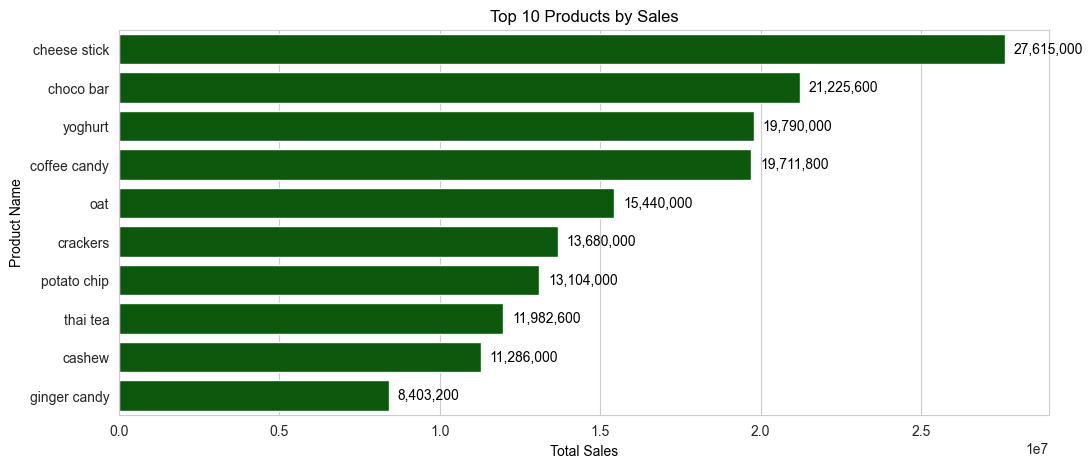

In [630]:
# 10. Relationship between Product and Total Sales
product_sales = df_cleaned.groupby("Product")["Total"].sum().reset_index().sort_values("Total", ascending=False)

plt.figure(figsize=(12, 5))
ax = sns.barplot(x="Total", y="Product", data=product_sales[:10], palette=[custom_palette[0]])
plt.title("Top 10 Products by Sales", color=custom_palette[1])
plt.xlabel("Total Sales", color=custom_palette[1])
plt.ylabel("Product Name", color=custom_palette[1])

# Tambahkan label di ujung bar
for i, v in enumerate(product_sales[:10]["Total"]):
    ax.text(v + 0.01 * product_sales["Total"].max(), i, f"{v:,.0f}", color=custom_palette[1], va='center', fontsize=10)

plt.show()

SEGMENTASI PELANGGAN MODEL RECENCY, FREQUENCY, MONETARY (RFM)

In [631]:
#Menghitung Total Price untuk penghitungan monetary pada df1
df_cleaned['TotalPrice'] = df_cleaned['Quanitity'] * df_cleaned['Price']
df_cleaned.head()

,TransactionID,CustomerID,Date,Price,Quanitity,Total,Product,TotalPrice
0,T00001,C0328,2022-01-01,7500,4,30000,crackers,30000
1,T00001,C0328,2022-01-01,10000,2,20000,yoghurt,20000
2,T00001,C0328,2022-01-01,8800,4,35200,choco bar,35200
3,T00002,C0017,2022-01-01,10000,7,70000,yoghurt,70000
4,T00002,C0017,2022-01-01,10000,7,70000,yoghurt,70000


In [632]:
#Melihat rentang data setelah mengambil United Kingdom saja pada df1
print('Tanggal pesanan terjauh df :', df_cleaned['Date'].min())
print('Tangggal pesanan terdekat df :', df_cleaned['Date'].max())

Tanggal pesanan terjauh df : 2022-01-01 00:00:00
Tangggal pesanan terdekat df : 2022-12-31 00:00:00


In [633]:
#Karena dataset tersebut sudah lama, kita butuh untuk mengatur tanggal hari ini atau
#tanggal saat analisis dilakukan beberapa hari setelah tanggal pesanan terakhir
today_date1 = dt.datetime(2023,1,1)

In [634]:
df_cleaned.head()

,TransactionID,CustomerID,Date,Price,Quanitity,Total,Product,TotalPrice
0,T00001,C0328,2022-01-01,7500,4,30000,crackers,30000
1,T00001,C0328,2022-01-01,10000,2,20000,yoghurt,20000
2,T00001,C0328,2022-01-01,8800,4,35200,choco bar,35200
3,T00002,C0017,2022-01-01,10000,7,70000,yoghurt,70000
4,T00002,C0017,2022-01-01,10000,7,70000,yoghurt,70000


In [635]:
df_cleaned.drop(['Total'], axis=1, inplace=True)

In [636]:
df_cleaned

,TransactionID,CustomerID,Date,Price,Quanitity,Product,TotalPrice
0,T00001,C0328,2022-01-01,7500,4,crackers,30000
1,T00001,C0328,2022-01-01,10000,2,yoghurt,20000
2,T00001,C0328,2022-01-01,8800,4,choco bar,35200
3,T00002,C0017,2022-01-01,10000,7,yoghurt,70000
4,T00002,C0017,2022-01-01,10000,7,yoghurt,70000
...,...,...,...,...,...,...,...
5019,T01680,C0291,2022-12-31,15000,5,cheese stick,75000
5020,T01681,C0291,2022-12-31,3200,4,ginger candy,12800
5021,T01681,C0291,2022-12-31,9400,6,coffee candy,56400
5022,T01681,C0291,2022-12-31,16000,3,oat,48000


In [638]:
#Menghitung RFM dan membuat dataframe baru
#Kelompokkan data berdasarkan ID pelanggan dan hitung metrik Recency, Frequency, dan Monetary (RFM)
rfm1 = df_cleaned.groupby('CustomerID').agg({
                            'Date': lambda InvoiceDate: (today_date1 - InvoiceDate.max()).days,  # Recency
                            'TransactionID': lambda Invoice: Invoice.nunique(),  # Frequency
                            'TotalPrice': lambda TotalPrice: TotalPrice.sum()  # Monetary
})

# Ubah nama kolom menjadi recency, frequency, dan monetary
rfm1.columns = ["Recency", "Frequency", "Monetary"]
# Atur ulang indeks untuk membuat 'ID Pelanggan' menjadi kolom lagi
rfm1.reset_index(inplace=True)
# Menampilkan 10 baris pertama dari dataframe baru
rfm1.head(10)

,CustomerID,Recency,Frequency,Monetary
0,C0001,143,1,103400
1,C0002,75,3,192200
2,C0003,81,6,655600
3,C0004,24,4,407600
4,C0005,85,7,623000
5,C0006,163,2,150500
6,C0007,192,5,512600
7,C0008,207,1,12800
8,C0009,43,5,435400
9,C0010,41,2,272800


In [639]:
rfm1.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,492.0,99.758130,84.401453,1.0,31.0,79.0,153.5,362.0
Frequency,492.0,3.418699,1.705238,1.0,2.0,3.0,4.0,9.0
Monetary,492.0,329752.439024,194279.291616,7500.0,181350.0,293300.0,459875.0,1015600.0


In [640]:
# Pelabelan untuk Recency Score
rfm1["Recency_Score"] = pd.qcut(rfm1["Recency"], 5, labels=[5,4,3,2,1])

# Pelabelan untuk Frequency Score
#penggunaan "rank (method=first)" adalah metode untuk menetapkan nilai ke beberapa ekspresi berulang
#(nilai yang masuk ke dalam 2 kategori berbeda, dll.)
rfm1["Frequency_Score"] = pd.qcut(rfm1['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

# Pelabelan untuk Monetary Score
rfm1["Monetary_Score"] = pd.qcut(rfm1['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Penggabungan skor R,F,dan M untuk RFM Score
rfm1["RFM_Score"] = (rfm1["Recency_Score"].astype(str) + rfm1["Frequency_Score"].astype(str) + rfm1["Monetary_Score"].astype(str))

rfm1.head(5)

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
0,C0001,143,1,103400,2,1,1,211
1,C0002,75,3,192200,3,2,2,322
2,C0003,81,6,655600,3,5,5,355
3,C0004,24,4,407600,5,3,4,534
4,C0005,85,7,623000,3,5,5,355


SEGMENTASI PELANGGAN DENGAN K-MEANS CLUSTERING

In [641]:
rfm_data = rfm1[['Recency', 'Frequency', 'Monetary']]
rfm_data.head()

,Recency,Frequency,Monetary
0,143,1,103400
1,75,3,192200
2,81,6,655600
3,24,4,407600
4,85,7,623000


Standarisasi

In [642]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

In [643]:
# Nilai K optimal = 3
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_clusters = kmeans.fit_predict(rfm_scaled)

# Tambahkan hasil clustering ke dataset
rfm1['Cluster'] = rfm_clusters

In [644]:
kmeans.cluster_centers_

array([[-0.48350774, -0.24578699, -0.37845898],
       [-0.52618085,  1.20500396,  1.28750083],
       [ 1.35002642, -0.8637083 , -0.73208721]])

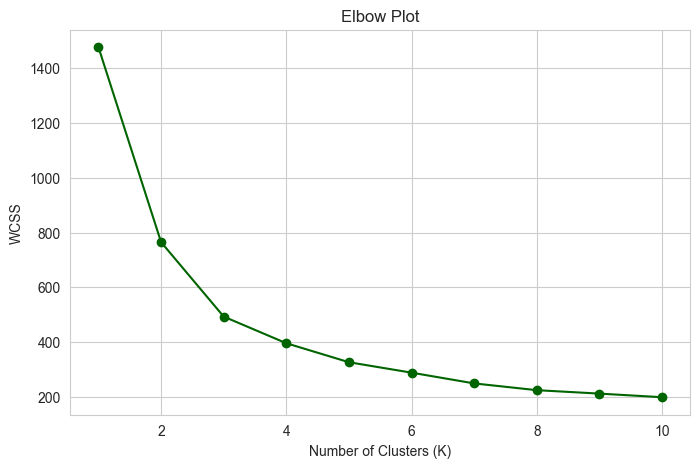

In [645]:
# Tentukan rentang nilai K
wcss = []
range_k = range(1, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)  # Inertia = Within-Cluster-Sum-of-Squares (WCSS)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_k, wcss, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

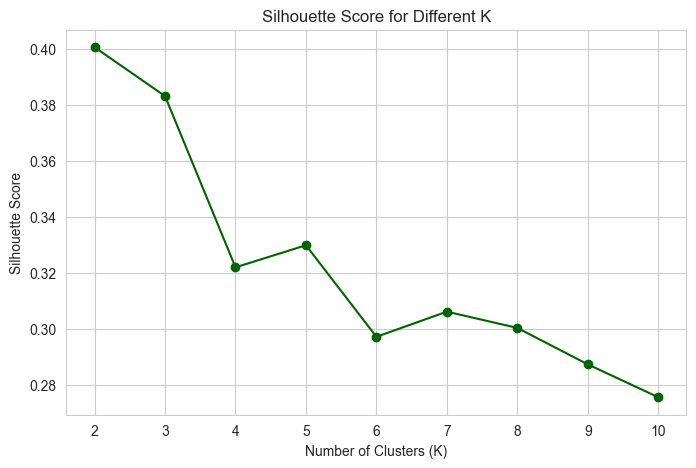

In [646]:
# from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  # K minimum 2 untuk Silhouette
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    score = silhouette_score(rfm_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

In [647]:
rfm1.describe()

,Recency,Frequency,Monetary,Cluster
count,492.000000,492.000000,4.920000e+02,492.000000
mean,99.758130,3.418699,3.297524e+05,0.825203
std,84.401453,1.705238,1.942793e+05,0.828425
min,1.000000,1.000000,7.500000e+03,0.000000
25%,31.000000,2.000000,1.813500e+05,0.000000
50%,79.000000,3.000000,2.933000e+05,1.000000
75%,153.500000,4.000000,4.598750e+05,2.000000
max,362.000000,9.000000,1.015600e+06,2.000000


In [648]:
rfm1

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Cluster
0,C0001,143,1,103400,2,1,1,211,2
1,C0002,75,3,192200,3,2,2,322,0
2,C0003,81,6,655600,3,5,5,355,1
3,C0004,24,4,407600,5,3,4,534,0
4,C0005,85,7,623000,3,5,5,355,1
...,...,...,...,...,...,...,...,...,...
487,C0496,191,2,272400,1,2,3,123,2
488,C0497,127,2,267600,2,2,3,223,0
489,C0498,28,5,502800,4,5,4,454,1
490,C0499,14,4,248200,5,4,3,543,0


In [649]:
# Melihat RFM Score unik yang masuk ke setiap cluster
rfm_score_per_cluster = rfm1.groupby('Cluster')['RFM_Score'].unique()

for cluster, scores in rfm_score_per_cluster.items():
    print(f"Cluster {cluster}:")
    print(sorted(scores))

Cluster 0:
['153', '211', '212', '214', '221', '222', '223', '224', '231', '232', '233', '234', '242', '243', '244', '311', '312', '313', '321', '322', '323', '324', '331', '332', '333', '334', '342', '343', '344', '353', '411', '413', '421', '422', '423', '424', '431', '432', '433', '434', '441', '442', '443', '444', '452', '453', '511', '512', '514', '521', '522', '523', '524', '531', '532', '533', '534', '542', '543', '544']
Cluster 1:
['144', '145', '154', '234', '244', '245', '254', '255', '335', '344', '345', '354', '355', '444', '445', '454', '455', '534', '535', '544', '545', '553', '554', '555']
Cluster 2:
['111', '112', '113', '121', '122', '123', '124', '131', '132', '133', '134', '144', '154', '211', '212', '213', '221', '222', '223', '231', '232', '233', '234', '241']


In [650]:
cluster_counts = rfm1['Cluster'].value_counts()
print(cluster_counts)

Cluster
0    219
1    140
2    133
Name: count, dtype: int64


In [651]:
rfm1['Recency_Score'] = rfm1['Recency_Score'].astype(int)
rfm1['Frequency_Score'] = rfm1['Frequency_Score'].astype(int)
rfm1['Monetary_Score'] = rfm1['Monetary_Score'].astype(int)

In [652]:
cluster_summary = rfm1.groupby('Cluster')[['Recency_Score', 'Frequency_Score', 'Monetary_Score']].mean().astype(int)
print(cluster_summary)

         Recency_Score  Frequency_Score  Monetary_Score
Cluster                                                
0                    3                2               2
1                    3                4               4
2                    1                1               1


In [653]:
silhouette_avg = silhouette_score(rfm_scaled, rfm1['Cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.383267202367898


In [654]:
# Buat label untuk setiap cluster
cluster_labels = {
    0: 'Grow Potential Customers',
    1: 'Loyal Customers',
    2: 'Churn Customers'
}

# Tambahkan kolom label ke cluster_summary
cluster_summary['Label'] = cluster_summary.index.map(cluster_labels)
print(cluster_summary)

         Recency_Score  Frequency_Score  Monetary_Score  \
Cluster                                                   
0                    3                2               2   
1                    3                4               4   
2                    1                1               1   

                            Label  
Cluster                            
0        Grow Potential Customers  
1                 Loyal Customers  
2                 Churn Customers  


In [655]:
# Tampilkan ringkasan statistik Recency, Frequency, dan Monetary untuk setiap cluster
for cluster_id in sorted(rfm1['Cluster'].unique()):
    cluster_data = rfm1[rfm1['Cluster'] == cluster_id]
    recency_mean = cluster_data['Recency'].mean()
    frequency_mean = cluster_data['Frequency'].mean()
    monetary_mean = cluster_data['Monetary'].mean()
    print(f"Cluster {cluster_id}:")
    print(f"  Rata-rata Recency   : {recency_mean:.2f}")
    print(f"  Rata-rata Frequency : {frequency_mean:.2f}")
    print(f"  Rata-rata Monetary  : {monetary_mean:.2f}\n")

Cluster 0:
  Rata-rata Recency   : 58.99
  Rata-rata Frequency : 3.00
  Rata-rata Monetary  : 256300.46

Cluster 1:
  Rata-rata Recency   : 55.39
  Rata-rata Frequency : 5.47
  Rata-rata Monetary  : 579632.86

Cluster 2:
  Rata-rata Recency   : 213.59
  Rata-rata Frequency : 1.95
  Rata-rata Monetary  : 187667.67



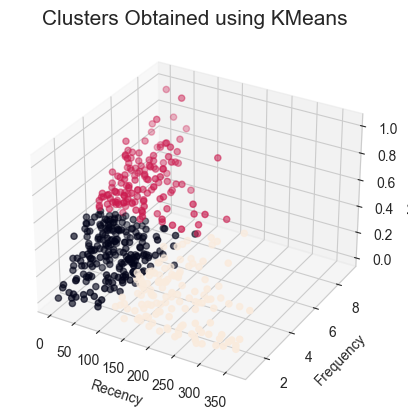

In [656]:
#melihat hasil 3D persebaran cluster menggunakan kmeans
p=rfm1['Recency']
q=rfm1['Frequency']
r=rfm1['Monetary']

ax= plt.axes(projection='3d')

ax.scatter3D(p, q, r , c=rfm1['Cluster'])
plt.title('Clusters Obtained using KMeans',fontsize=15)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

ANALISIS MARKET BASKET 

In [657]:
# Merge RFM cluster info to transaction data
df_merged = df_cleaned.merge(rfm1[['CustomerID', 'Cluster']], on='CustomerID', how='left')
# Merge cluster summary (scores) to the result
df_merged = df_merged.merge(cluster_summary, on='Cluster', how='left')

In [658]:
# Gabungkan informasi segmentasi ke data transaksi
df_mba = rfm1.merge(
    df_merged[['CustomerID', 'Cluster']],
    on='CustomerID',
    how='left'
)

# Cek hasil gabungan
df_merged[['TransactionID', 'CustomerID', 'Product', 'Cluster']].head()

,TransactionID,CustomerID,Product,Cluster
0,T00001,C0328,crackers,1
1,T00001,C0328,yoghurt,1
2,T00001,C0328,choco bar,1
3,T00002,C0017,yoghurt,0
4,T00002,C0017,yoghurt,0


In [659]:
df_merged['Product'] = df_merged['Product'].astype(str)

In [660]:
# Ambil semua kategori segmentasi pelanggan
segments = df_merged['Cluster'].unique()
print("Daftar Segmen Pelanggan:", segments)

Daftar Segmen Pelanggan: [1 0 2]


In [661]:
# Pilih salah satu segmen
segment = 1
# Filter data berdasarkan segmen
df_seg = df_merged[df_merged['Cluster'] == segment]

# Buat keranjang transaksi per InvoiceNo (list produk per transaksi)
keranjang = df_seg.groupby('TransactionID')['Product'].apply(list)
keranjang

TransactionID
T00001                       [crackers, yoghurt, choco bar]
T00005                                           [thai tea]
T00007    [coffee candy, ginger candy, crackers, cracker...
T00009       [coffee candy, cashew, ginger candy, thai tea]
T00010                                          [choco bar]
                                ...                        
T01674                        [oat, cheese stick, crackers]
T01675                    [ginger candy, coffee candy, oat]
T01676       [yoghurt, potato chip, cheese stick, thai tea]
T01677                                [choco bar, thai tea]
T01679    [yoghurt, coffee candy, crackers, crackers, ca...
Name: Product, Length: 766, dtype: object

In [662]:
# Encoding ke format 0-1
te = TransactionEncoder()
te_ary = te.fit(keranjang).transform(keranjang)
basket_df = pd.DataFrame(te_ary, columns=te.columns_)

basket_df.head()

,cashew,cheese stick,choco bar,coffee candy,crackers,ginger candy,oat,potato chip,thai tea,yoghurt
0,False,False,True,False,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True,False
2,False,False,False,True,True,True,False,False,False,False
3,True,False,False,True,False,True,False,False,True,False
4,False,False,True,False,False,False,False,False,False,False


In [663]:
from mlxtend.frequent_patterns import apriori

# Jalankan algoritma apriori
frequentitemsets = apriori(basket_df, min_support=0.01, use_colnames=True)

# Cek hasil frequent itemsets
frequentitemsets.sort_values(by='support', ascending=False).head(10)

,support,itemsets
8,0.394256,(thai tea)
1,0.352480,(cheese stick)
3,0.293734,(coffee candy)
9,0.281984,(yoghurt)
5,0.279373,(ginger candy)
4,0.267624,(crackers)
6,0.249347,(oat)
2,0.236292,(choco bar)
7,0.229765,(potato chip)
0,0.154047,(cashew)


In [664]:
# Ambil pasangan item (itemsets dengan panjang 2)
top_pairs = frequentitemsets[frequentitemsets['itemsets'].apply(lambda x: len(x) == 2)]
top_pairs = top_pairs.sort_values(by='support', ascending=False)
top_pairs['Item 1'] = top_pairs['itemsets'].apply(lambda x: list(x)[0])
top_pairs['Item 2'] = top_pairs['itemsets'].apply(lambda x: list(x)[1])

top_pairs

,support,itemsets,Item 1,Item 2
25,0.144909,"(thai tea, cheese stick)",thai tea,cheese stick
20,0.105744,"(cheese stick, coffee candy)",cheese stick,coffee candy
47,0.104439,"(thai tea, ginger candy)",thai tea,ginger candy
21,0.097911,"(cheese stick, crackers)",cheese stick,crackers
38,0.095300,"(thai tea, coffee candy)",thai tea,coffee candy
26,0.095300,"(cheese stick, yoghurt)",cheese stick,yoghurt
54,0.090078,"(thai tea, yoghurt)",thai tea,yoghurt
32,0.088773,"(thai tea, choco bar)",thai tea,choco bar
35,0.083551,"(ginger candy, coffee candy)",ginger candy,coffee candy
43,0.083551,"(thai tea, crackers)",thai tea,crackers


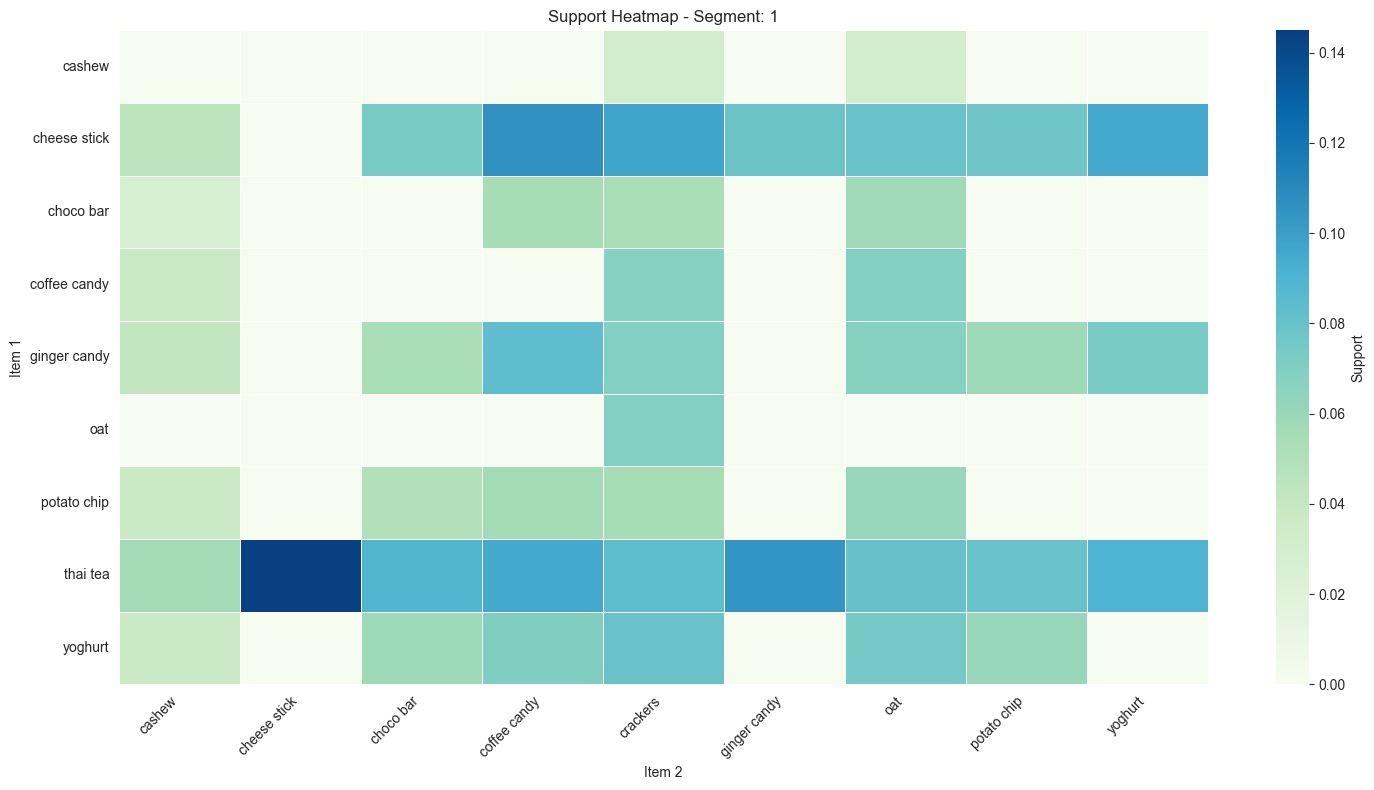

In [ ]:
# Buat data heatmap
heatmap_data = pd.crosstab(top_pairs['Item 1'], top_pairs['Item 2'],
                           values=top_pairs['support'],
                           aggfunc='mean').fillna(0)
# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, annot=False, cmap='GnBu', fmt=".2f",
            cbar_kws={'label': 'Support'}, linewidths=0.5)
plt.title(f'Support Heatmap - Segment: {segment}')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Item 2')
plt.ylabel('Item 1')
plt.tight_layout()
plt.show()

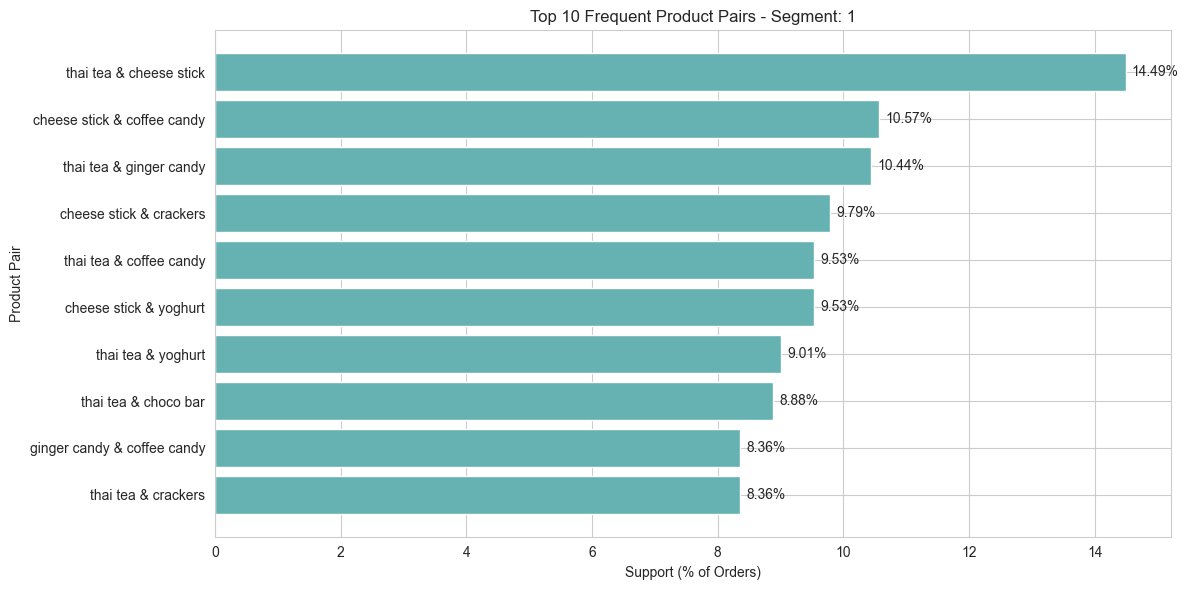

In [ ]:
# Top 10 pairs
top_10_pairs = top_pairs.head(10)

# Gabungkan nama pasangan
top_10_pairs['pair'] = top_10_pairs['Item 1'] + ' & ' + top_10_pairs['Item 2']
support_values = top_10_pairs['support'] * 100

# Plot bar chart
plt.figure(figsize=(12,6))
bars = plt.barh(top_10_pairs['pair'], support_values, color='#66b2b2')
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%', va='center', ha='left', fontsize=10)
plt.xlabel("Support (% of Orders)")
plt.ylabel("Product Pair")
plt.title(f"Top 10 Frequent Product Pairs - Segment: {segment}")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# Buat association rules dari frequent itemsets
rules = association_rules(frequentitemsets, metric='lift', min_threshold=0.2)
# Pilih kolom penting
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
# Sort berdasarkan lift tertinggi
rules = rules.sort_values(by='lift', ascending=False).reset_index(drop=True)

rules.head()

,antecedents,consequents,support,confidence,lift
0,"(cashew, crackers)",(ginger candy),0.013055,0.416667,1.491433
1,(ginger candy),"(cashew, crackers)",0.013055,0.046729,1.491433
2,(yoghurt),"(cashew, crackers)",0.013055,0.046296,1.477623
3,"(cashew, crackers)",(yoghurt),0.013055,0.416667,1.477623
4,(yoghurt),"(cashew, oat)",0.011749,0.041667,1.387681


In [ ]:
# Buat kolom label rule
rules['rule'] = rules['antecedents'].apply(lambda x: ', '.join(sorted(x))) + \
                ' --> ' + rules['consequents'].apply(lambda x: ', '.join(sorted(x)))
rules = rules[['rule', 'support', 'confidence', 'lift']]
rules

,rule,support,confidence,lift
0,"cashew, crackers --> ginger candy",0.013055,0.416667,1.491433
1,"ginger candy --> cashew, crackers",0.013055,0.046729,1.491433
2,"yoghurt --> cashew, crackers",0.013055,0.046296,1.477623
3,"cashew, crackers --> yoghurt",0.013055,0.416667,1.477623
4,"yoghurt --> cashew, oat",0.011749,0.041667,1.387681
...,...,...,...,...
625,"ginger candy, potato chip --> thai tea",0.011749,0.200000,0.507285
626,"coffee candy --> potato chip, thai tea",0.011749,0.040000,0.502295
627,"potato chip, thai tea --> coffee candy",0.011749,0.147541,0.502295
628,"ginger candy, thai tea --> potato chip",0.011749,0.112500,0.489631


In [ ]:
filtered_rules = rules[(rules['confidence'] > 0.2) & (rules['lift'] > 1)]
top10_rules = filtered_rules.sort_values(by='lift', ascending=False).head(10)
top10_rules

,rule,support,confidence,lift
0,"cashew, crackers --> ginger candy",0.013055,0.416667,1.491433
3,"cashew, crackers --> yoghurt",0.013055,0.416667,1.477623
5,"cashew, oat --> yoghurt",0.011749,0.391304,1.387681
7,"crackers, potato chip --> oat",0.018277,0.333333,1.336824
8,"cashew, yoghurt --> crackers",0.013055,0.344828,1.288478
10,"coffee candy, thai tea --> cheese stick",0.043081,0.452055,1.282496
12,"cashew, thai tea --> ginger candy",0.019582,0.348837,1.248642
15,"cashew, oat --> ginger candy",0.010444,0.347826,1.245022
17,"cashew, yoghurt --> oat",0.011749,0.310345,1.244629
22,"cashew, ginger candy --> thai tea",0.019582,0.468750,1.188949


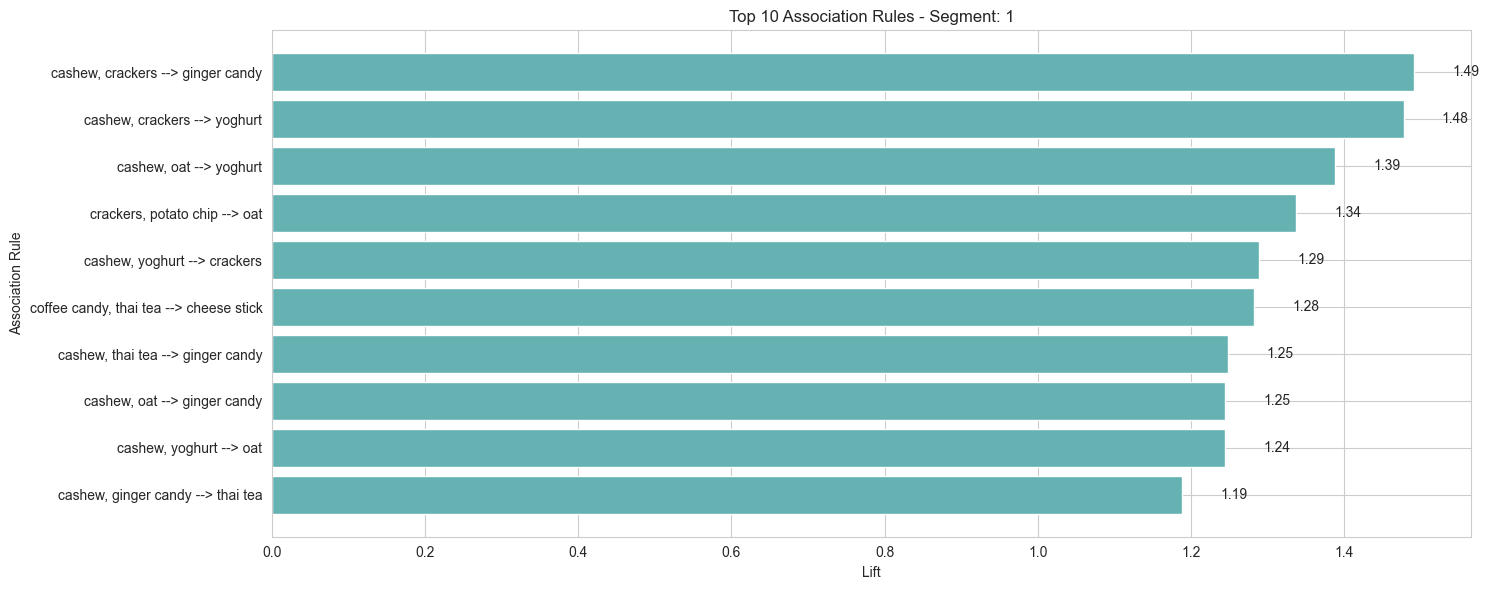

In [ ]:
# Plot bar chart lift dari top 10 rules
rule_labels = top10_rules['rule']
lift_values = top10_rules['lift']

plt.figure(figsize=(15, 6))
bars = plt.barh(rule_labels, lift_values, color='#66b2b2')
for bar in bars:
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10)
plt.xlabel("Lift")
plt.ylabel("Association Rule")
plt.title(f"Top 10 Association Rules - Segment: {segment}")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
def get_apriori_rules(df_merged, min_support=0.01, min_confidence=0.2, min_lift=1.0, cluster=None):

    if cluster is not None:
        if isinstance(cluster, list):
            df_filtered = df_merged[df_merged['Cluster'].isin(cluster)]
        else:
            df_filtered = df_merged[df_merged['Cluster'] == cluster]
    else:
        df_filtered = df_merged

    # Grup produk per transaksi (CustomerID atau TransactionID, sesuai kebutuhan)
    transaksi = df_filtered.groupby('TransactionID')['Product'].apply(list).tolist()

    # Ubah menjadi format one-hot encoded
    te = TransactionEncoder()
    te_ary = te.fit(transaksi).transform(transaksi)
    df_te = pd.DataFrame(te_ary, columns=te.columns_)

    # Hitung itemset dan aturan asosiasi
    itemsets = apriori(df_te, min_support=min_support, use_colnames=True)
    rules = association_rules(itemsets, metric="confidence", min_threshold=min_confidence)

    # Filter hanya aturan dengan lift > min_lift
    rules_filtered = rules[
        rules['lift'] >= min_lift
    ][['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift']]

    return rules_filtered

In [675]:
# Ambil 10 aturan asosiasi teratas berdasarkan nilai lift untuk segmen 'Best Customer'
rules_a = get_apriori_rules(df_merged[df_merged['Cluster'] == 2])  
top10_rules_a = rules_a.sort_values(by='lift', ascending=False)
top10_rules_a

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
216,"(thai tea, cashew, crackers)",(potato chip),0.015444,0.208494,0.011583,0.750000,3.597222
218,"(thai tea, cashew)","(potato chip, crackers)",0.050193,0.065637,0.011583,0.230769,3.515837
219,"(potato chip, cashew)","(thai tea, crackers)",0.030888,0.115830,0.011583,0.375000,3.237500
220,"(cashew, crackers)","(thai tea, potato chip)",0.054054,0.069498,0.011583,0.214286,3.083333
215,"(thai tea, potato chip, crackers)",(cashew),0.027027,0.150579,0.011583,0.428571,2.846154
...,...,...,...,...,...,...,...
48,(potato chip),(ginger candy),0.208494,0.254826,0.054054,0.259259,1.017396
141,"(choco bar, crackers)",(oat),0.057915,0.262548,0.015444,0.266667,1.015686
89,"(choco bar, crackers)",(cheese stick),0.057915,0.332046,0.019305,0.333333,1.003876
59,"(coffee candy, cashew)",(cheese stick),0.034749,0.332046,0.011583,0.333333,1.003876


In [676]:
rules_b = get_apriori_rules(df_merged[df_merged['Cluster'] == 0])
top10_rules_b = rules_b.sort_values(by='lift', ascending=False)
top10_rules_b

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
62,"(yoghurt, coffee candy)",(cashew),0.045662,0.120244,0.010654,0.233333,1.940506
185,"(thai tea, yoghurt)",(potato chip),0.070015,0.179604,0.021309,0.304348,1.694547
60,"(thai tea, cashew)",(coffee candy),0.036530,0.228311,0.013699,0.375000,1.642500
83,"(cheese stick, potato chip)",(coffee candy),0.041096,0.228311,0.015221,0.370370,1.622222
55,"(ginger candy, cashew)",(cheese stick),0.027397,0.278539,0.012177,0.444444,1.595628
...,...,...,...,...,...,...,...
31,(ginger candy),(crackers),0.261796,0.260274,0.068493,0.261628,1.005202
32,(crackers),(ginger candy),0.260274,0.261796,0.068493,0.263158,1.005202
160,"(crackers, oat)",(yoghurt),0.051750,0.234399,0.012177,0.235294,1.003820
171,"(ginger candy, oat)",(yoghurt),0.051750,0.234399,0.012177,0.235294,1.003820


In [677]:
def rules_to_set(rules_df):
    return set((frozenset(a), frozenset(c)) for a, c in zip(rules_df['antecedents'], rules_df['consequents']))

# Konversi ke set
set_a = rules_to_set(top10_rules_a)
set_b = rules_to_set(top10_rules_b)

# GAP Rules
gap_rules = set_a - set_b

In [678]:
print("=== GAP RULES ===")
count = 0
for a, c in gap_rules:
    print(f"{set(a)} => {set(c)}")
    count += 1
print(f"Total GAP RULES: {count}")

=== GAP RULES ===
{'choco bar', 'crackers'} => {'potato chip'}
{'ginger candy', 'cashew'} => {'thai tea'}
{'cheese stick', 'oat'} => {'crackers'}
{'thai tea', 'choco bar'} => {'oat'}
{'cashew', 'oat'} => {'crackers'}
{'yoghurt', 'potato chip'} => {'coffee candy'}
{'cheese stick', 'cashew'} => {'yoghurt'}
{'cheese stick', 'crackers'} => {'yoghurt'}
{'thai tea', 'ginger candy'} => {'crackers'}
{'thai tea', 'ginger candy'} => {'cashew'}
{'crackers'} => {'potato chip'}
{'yoghurt', 'choco bar'} => {'coffee candy'}
{'thai tea', 'cashew'} => {'potato chip'}
{'cheese stick', 'coffee candy', 'crackers'} => {'oat'}
{'thai tea', 'cheese stick'} => {'yoghurt'}
{'ginger candy', 'yoghurt'} => {'cheese stick'}
{'ginger candy', 'crackers'} => {'yoghurt'}
{'cheese stick'} => {'crackers'}
{'cashew', 'crackers'} => {'ginger candy'}
{'thai tea', 'potato chip'} => {'crackers'}
{'crackers', 'oat'} => {'coffee candy'}
{'potato chip', 'cashew', 'crackers'} => {'thai tea'}
{'cheese stick', 'crackers', 'oat'} =

In [681]:
# Cari aturan yang sama-sama muncul di kedua cluster
common_rules = set_a & set_b

# Buat DataFrame dari common_rules beserta nilai support, confidence, dan lift dari top10_rules_a
common_rules_list = []
for a, c in common_rules:
    rule_row = top10_rules_a[
        (top10_rules_a['antecedents'] == a) & (top10_rules_a['consequents'] == c)
    ]
    if not rule_row.empty:
        support = rule_row['support'].values[0]
        confidence = rule_row['confidence'].values[0]
        lift = rule_row['lift'].values[0]
    else:
        support = confidence = lift = None
    common_rules_list.append({
        'Antecedents': ', '.join(sorted(a)),
        'Consequents': ', '.join(sorted(c)),
        'Support': support,
        'Confidence': confidence,
        'Lift': lift
    })
common_rules_df = pd.DataFrame(common_rules_list)
common_rules_df.sort_values(by='Lift', ascending=False, inplace=True)
common_rules_df  # Tampilkan aturan yang sama-sama muncul di 2 cluster

,Antecedents,Consequents,Support,Confidence,Lift
23,"coffee candy, potato chip",yoghurt,0.019305,0.416667,1.660256
11,"cashew, coffee candy",crackers,0.015444,0.444444,1.534815
16,"cheese stick, choco bar",crackers,0.019305,0.416667,1.438889
21,"choco bar, yoghurt",oat,0.011583,0.375000,1.428309
1,"coffee candy, ginger candy",crackers,0.023166,0.375000,1.295000
14,"coffee candy, yoghurt",potato chip,0.019305,0.263158,1.262183
10,cashew,crackers,0.054054,0.358974,1.239658
3,"choco bar, oat",yoghurt,0.011583,0.300000,1.195385
7,"choco bar, thai tea",cheese stick,0.019305,0.384615,1.158318
0,"coffee candy, crackers",cheese stick,0.030888,0.380952,1.147287


In [674]:
# Buat DataFrame dari gap_rules beserta nilai support, confidence, dan lift
gap_rules_list = []
for a, c in gap_rules:
    # Cari baris yang sesuai di top10_rules_a
    rule_row = top10_rules_a[
        (top10_rules_a['antecedents'] == a) & (top10_rules_a['consequents'] == c)
    ]
    if not rule_row.empty:
        support = rule_row['support'].values[0]
        confidence = rule_row['confidence'].values[0]
        lift = rule_row['lift'].values[0]
    else:
        support = confidence = lift = None
    gap_rules_list.append({
        'Antecedents': ', '.join(sorted(a)),
        'Consequents': ', '.join(sorted(c)),
        'Support': support,
        'Confidence': confidence,
        'Lift': lift
    })
gap_rules_df = pd.DataFrame(gap_rules_list)
gap_rules_df.sort_values(by='Lift', ascending=False, inplace=True)
gap_rules_df  # Return top 10 gap rules

,Antecedents,Consequents,Support,Confidence,Lift
2,"cashew, crackers, thai tea",potato chip,0.011583,0.750000,3.597222
6,"cashew, thai tea","crackers, potato chip",0.011583,0.230769,3.515837
7,"cashew, potato chip","crackers, thai tea",0.011583,0.375000,3.237500
3,"cashew, crackers","potato chip, thai tea",0.011583,0.214286,3.083333
0,"crackers, potato chip, thai tea",cashew,0.011583,0.428571,2.846154
5,"cashew, crackers, potato chip",thai tea,0.011583,1.000000,2.726316
1,"cashew, potato chip, thai tea",crackers,0.011583,0.750000,2.590000
8,"ginger candy, potato chip, thai tea",crackers,0.011583,0.600000,2.072000
9,"crackers, ginger candy, potato chip",thai tea,0.011583,0.750000,2.044737
4,"ginger candy, potato chip","crackers, thai tea",0.011583,0.214286,1.850000


In [ ]:
# Buat DataFrame dari gap_rules beserta nilai support, confidence, dan lift
gap_rules_list = []
for a, c in gap_rules:
    # Cari baris yang sesuai di top10_rules_a
    rule_row = top10_rules_a[
        (top10_rules_a['antecedents'] == a) & (top10_rules_a['consequents'] == c)
    ]
    if not rule_row.empty:
        support = rule_row['support'].values[0]
        confidence = rule_row['confidence'].values[0]
        lift = rule_row['lift'].values[0]
    else:
        support = confidence = lift = None
    gap_rules_list.append({
        'Antecedents': ', '.join(sorted(a)),
        'Consequents': ', '.join(sorted(c)),
        'Support': support,
        'Confidence': confidence,
        'Lift': lift
    })
gap_rules_df = pd.DataFrame(gap_rules_list)
gap_rules_df.sort_values(by='Lift', ascending=False, inplace=True)
gap_rules_df  # Return top 10 gap rules

,Antecedents,Consequents,Support,Confidence,Lift
69,"cashew, crackers, thai tea",potato chip,0.011583,0.750000,3.597222
53,"cashew, thai tea","crackers, potato chip",0.011583,0.230769,3.515837
29,"cashew, potato chip","crackers, thai tea",0.011583,0.375000,3.237500
62,"cashew, crackers","potato chip, thai tea",0.011583,0.214286,3.083333
89,"crackers, potato chip, thai tea",cashew,0.011583,0.428571,2.846154
...,...,...,...,...,...
87,"cheese stick, coffee candy",yoghurt,0.027027,0.259259,1.033048
75,"cashew, crackers",potato chip,0.011583,0.214286,1.027778
82,ginger candy,potato chip,0.054054,0.212121,1.017396
90,potato chip,ginger candy,0.054054,0.259259,1.017396


In [ ]:
def rekomendasi_produk(pelanggan_items, gap_rules):
    rekomendasi = set()
    for antecedent, consequent in gap_rules:
        if antecedent.issubset(pelanggan_items):
            rekomendasi.update(consequent)
    return rekomendasi

pelanggan_items = {'crackers', 'yoghurt'}
rekomendasi = rekomendasi_produk(pelanggan_items, gap_rules)

print("Rekomendasi produk:")
print(rekomendasi)

Rekomendasi produk:
{'cheese stick', 'thai tea', 'potato chip', 'choco bar', 'ginger candy', 'oat'}


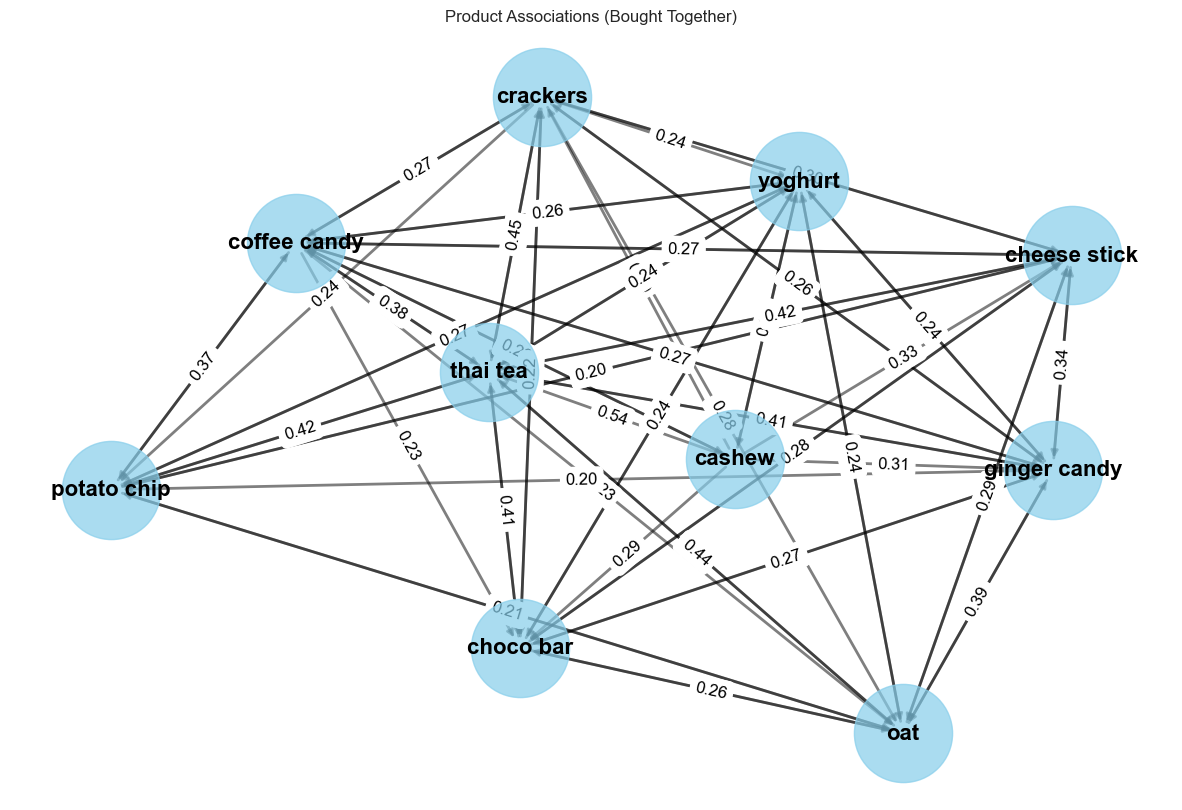

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty directed graph
G = nx.DiGraph()

# Add edges based on association rules in top10_rules_b (if not empty)
if not top10_rules_b.empty:
    for _, rule in top10_rules_b.iterrows():
        antecedents = rule['antecedents']
        consequents = rule['consequents']
        for antecedent in antecedents:
            for consequent in consequents:
                G.add_edge(antecedent, consequent, weight=rule['confidence'])
else:
    print("No GAP RULES to visualize.")

# Visualize the graph if edges exist
if G.number_of_edges() > 0:
    plt.figure(figsize=(15, 10), facecolor='white')
    pos = nx.spring_layout(G, k=0.15, iterations=10)
    
    nx.draw_networkx_nodes(G, pos, node_size=5000, node_color="skyblue", alpha=0.7)
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=16, font_weight="bold", font_color="black")

    edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

    plt.title('Product Associations (Bought Together)', fontsize=12)
    plt.axis('off')
    plt.show()


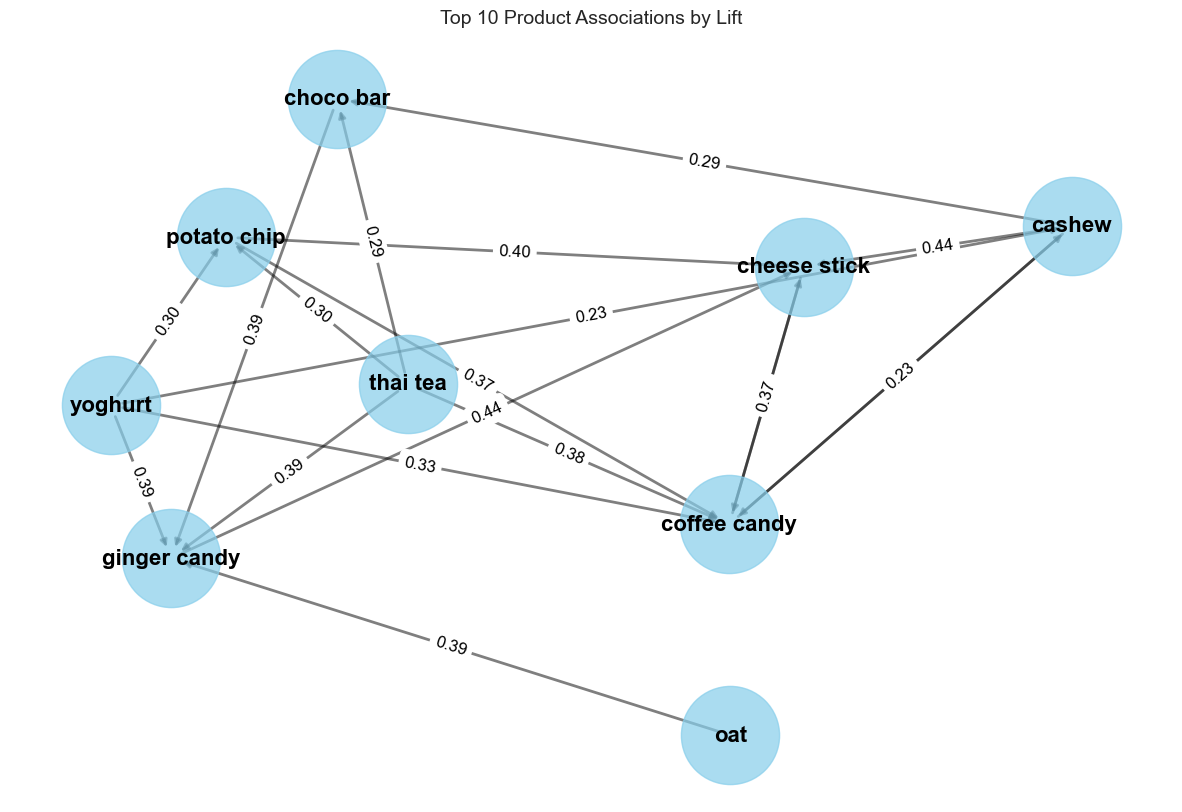

In [ ]:
import networkx as nx

import matplotlib.pyplot as plt

# Ambil top 10 rules berdasarkan nilai lift dari top10_rules_b
top10_lift_rules = top10_rules_b.sort_values(by='lift', ascending=False).head(10)

# Buat directed graph hanya dari top 10 rules
G = nx.DiGraph()

for _, rule in top10_lift_rules.iterrows():
    antecedents = rule['antecedents']
    consequents = rule['consequents']
    for antecedent in antecedents:
        for consequent in consequents:
            G.add_edge(antecedent, consequent, weight=rule['confidence'])

# Visualisasi jika ada edge
if G.number_of_edges() > 0:
    plt.figure(figsize=(15, 10), facecolor='white')
    pos = nx.spring_layout(G, k=0.15, iterations=10)
    nx.draw_networkx_nodes(G, pos, node_size=5000, node_color="skyblue", alpha=0.7)
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=16, font_weight="bold", font_color="black")
    edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
    plt.title('Top 10 Product Associations by Lift', fontsize=14)
    plt.axis('off')
    plt.show()
else:
    print("No rules to visualize.")

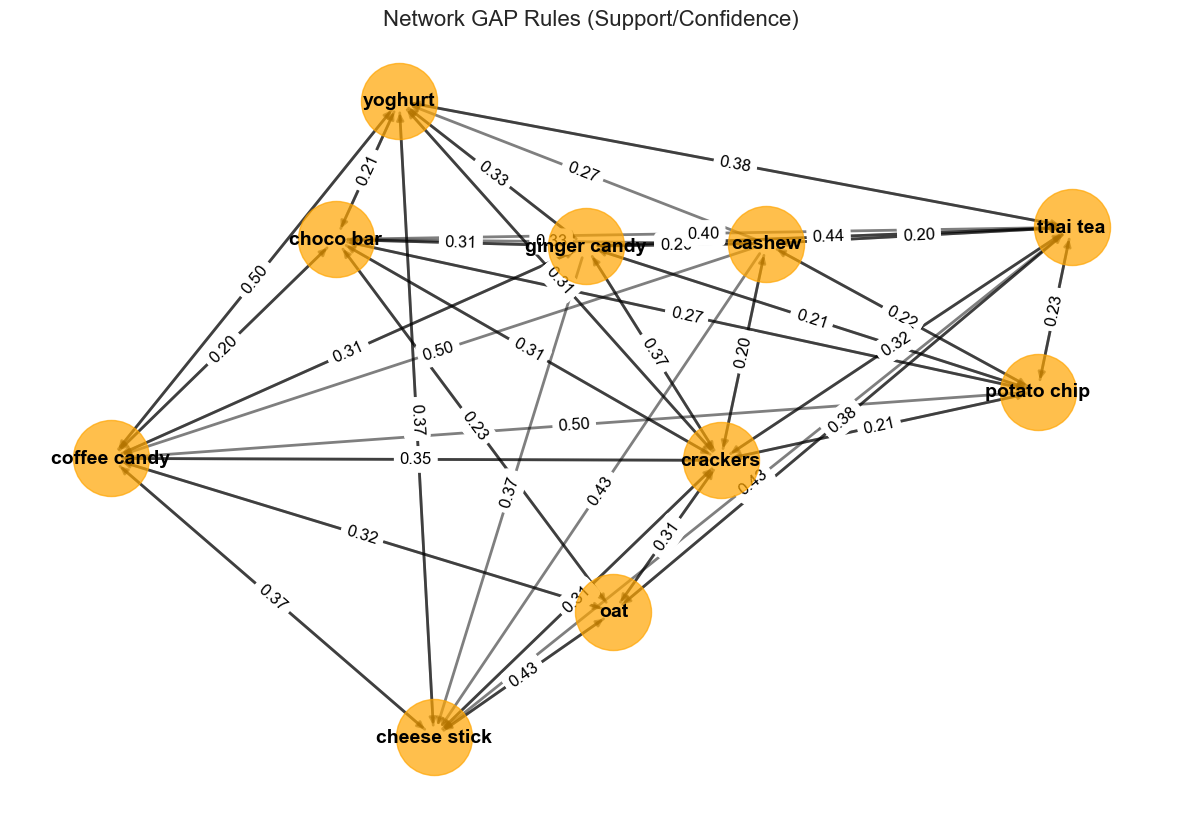

In [ ]:
import networkx as nx

import matplotlib.pyplot as plt

# Buat directed graph dari gap_rules_df
G_gap = nx.DiGraph()

for _, row in gap_rules_df.iterrows():
    antecedents = row['Antecedents'].split(', ')
    consequents = row['Consequents'].split(', ')
    confidence = row['Confidence'] if row['Confidence'] is not None else 0.0
    for a in antecedents:
        for c in consequents:
            G_gap.add_edge(a, c, weight=confidence)

# Visualisasi jika ada edge
if G_gap.number_of_edges() > 0:
    plt.figure(figsize=(15, 10), facecolor='white')
    pos = nx.spring_layout(G_gap, k=0.15, iterations=10)
    nx.draw_networkx_nodes(G_gap, pos, node_size=3000, node_color="orange", alpha=0.7)
    nx.draw_networkx_edges(G_gap, pos, width=2, alpha=0.5)
    nx.draw_networkx_labels(G_gap, pos, font_size=14, font_weight="bold", font_color="black")
    edge_labels = {(u, v): f"{G_gap[u][v]['weight']:.2f}" for u, v in G_gap.edges()}
    nx.draw_networkx_edge_labels(G_gap, pos, edge_labels=edge_labels, font_size=12)
    plt.title('Network GAP Rules (Support/Confidence)', fontsize=16)
    plt.axis('off')
    plt.show()
else:
    print("No GAP RULES edges to visualize.")